# Plotting and Interactivity with matplotlib

## Subplots

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


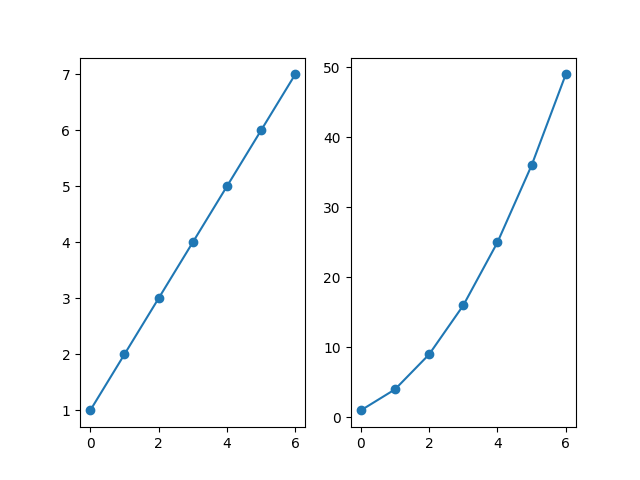

In [2]:
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 8)

plt.plot(linear_data, '-o')

In [3]:
plt.subplot(122)

quadratic_data = linear_data**2

plt.plot(quadratic_data, '-o')

<IPython.core.display.Javascript object>


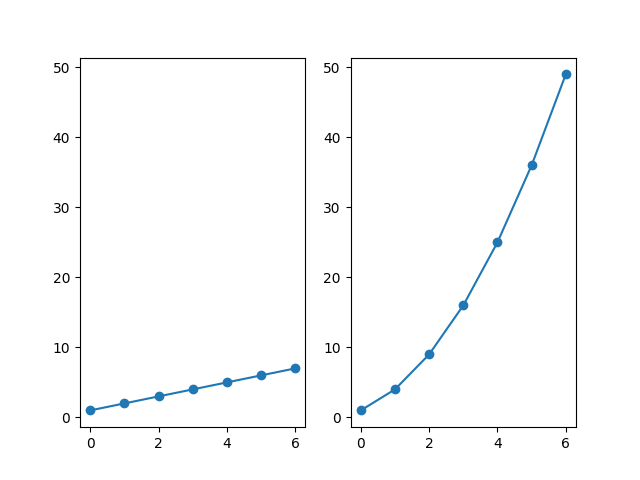

In [4]:
plt.figure()
ax1 = plt.subplot(121)
plt.plot(linear_data, '-o')

plt.subplot(122, sharey=ax1)
plt.plot(quadratic_data, '-o')

<IPython.core.display.Javascript object>


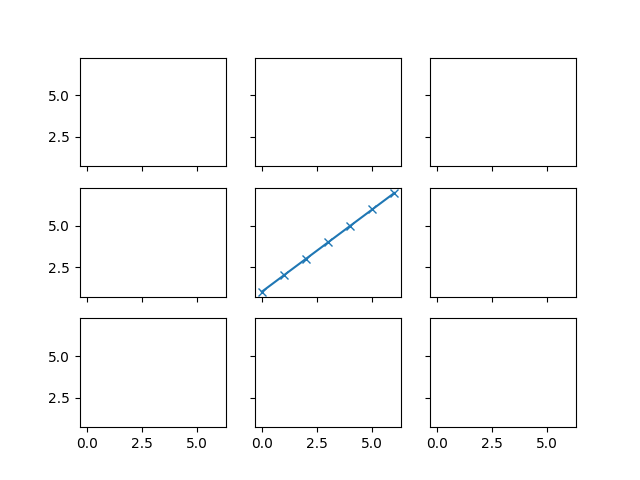

In [5]:
fig, ax = plt.subplots(3,3, sharex=True, sharey=True)
ax[1][1].plot(linear_data, '-x')

## Histograms

<IPython.core.display.Javascript object>


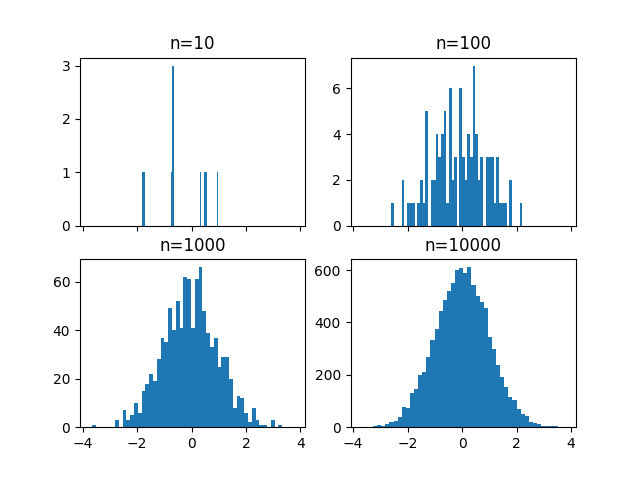

In [6]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, sharex=True)
axs=[ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=50)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


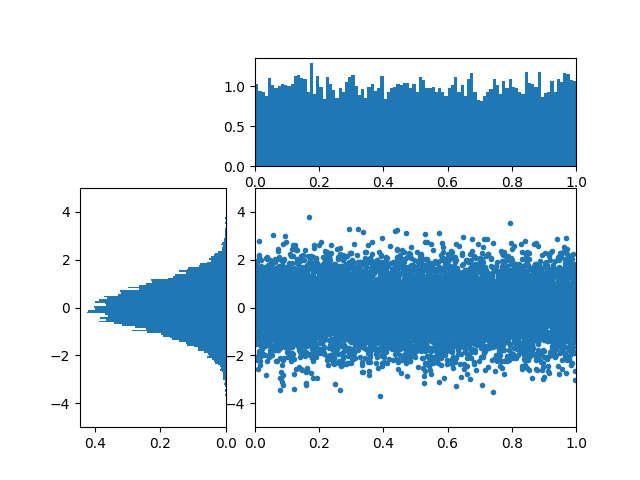

In [7]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [8]:
Y = np.random.normal(0, 1, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y, marker='.')
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [9]:
top_histogram.clear()
top_histogram.hist(X, bins=100, density=True)

(array([1.03052485, 0.94047899, 0.93047389, 0.88044841, 1.10056052,
        1.01051466, 0.98049937, 1.00050956, 1.03052485, 1.01051466,
        1.00050956, 1.03052485, 1.1305758 , 1.1405809 , 1.10056052,
        1.09055542, 0.92046879, 1.29065733, 0.9004586 , 1.12057071,
        0.99050446, 0.84042803, 1.11056561, 1.02051975, 0.95048408,
        0.85043313, 0.98049937, 0.93047389, 1.05053504, 1.11056561,
        1.1405809 , 1.00050956, 0.89045351, 0.96048918, 0.85043313,
        0.99050446, 1.03052485, 0.94047899, 0.98049937, 1.1305758 ,
        0.84042803, 0.93047389, 0.97049427, 0.99050446, 1.02051975,
        1.01051466, 1.04052994, 1.04052994, 0.97049427, 1.03052485,
        0.92046879, 1.11056561, 1.08055032, 0.98049937, 0.98049937,
        0.99050446, 0.92046879, 0.98049937, 0.93047389, 0.87044332,
        0.97049427, 1.01051466, 1.11056561, 0.93047389, 1.01051466,
        0.88044841, 1.09055542, 1.16059109, 0.93047389, 0.82041784,
        0.81041274, 0.87044332, 0.92046879, 0.96

In [10]:
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
side_histogram.invert_xaxis()

In [11]:
for ax in (top_histogram, lower_right):
    ax.set_xlim(0, 1)
for ax in (side_histogram, lower_right):
    ax.set_ylim(-5, 5)

## Box and Whisker Plots

In [12]:
import pandas as pd
import numpy as np
normal_sample = np.random.normal(0, 1, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal':normal_sample,
                  'random': random_sample,
                  'gamma' : gamma_sample})

In [13]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004881,0.500329,2.012148
std,0.995427,0.289422,1.432885
min,-3.958360,0.000081,0.014109
25%,-0.663515,0.249622,0.968639
50%,-0.001393,0.500859,1.681840
75%,0.659218,0.753244,2.688803
max,4.033592,0.999966,14.976940


<IPython.core.display.Javascript object>


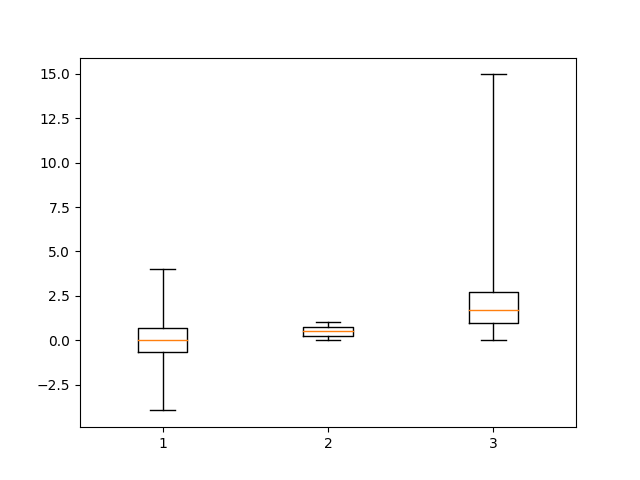

In [14]:
plt.figure()
_ = plt.boxplot(df['normal'], whis=[0, 100])

In [15]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0, 100])

<IPython.core.display.Javascript object>


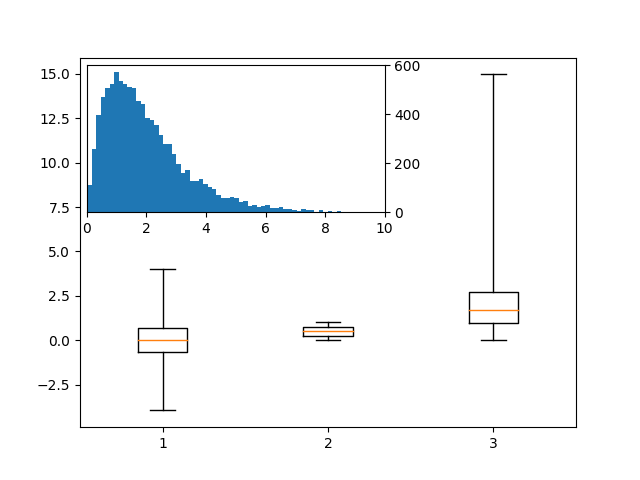

In [16]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0, 100])
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=1)

In [17]:
ax2.yaxis.tick_right()
ax2.set_xlim(0, 10)

(0.0, 10.0)

<IPython.core.display.Javascript object>


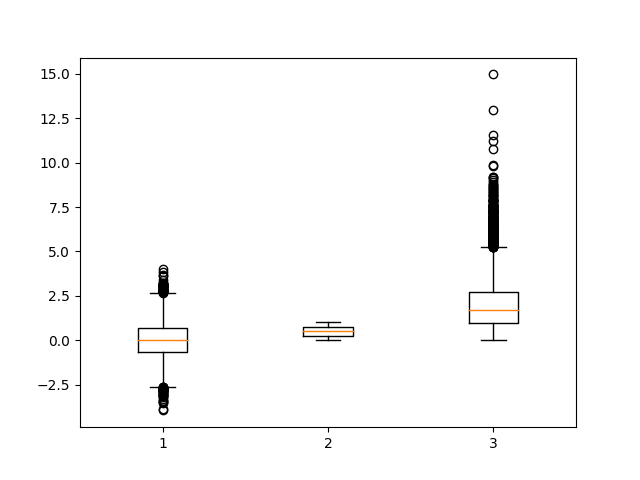

In [18]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

## Heapmaps

<IPython.core.display.Javascript object>


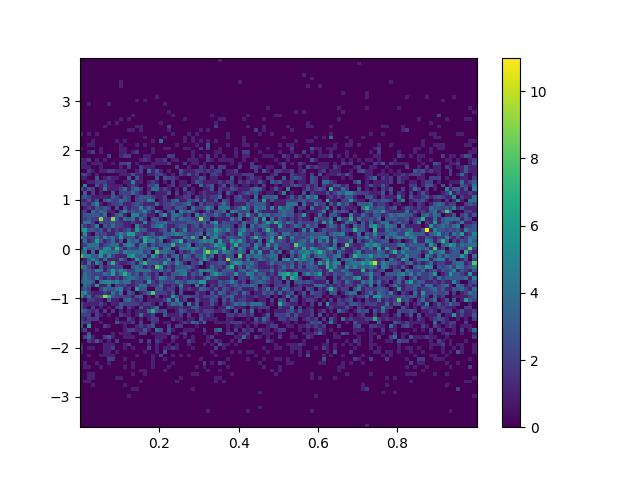

In [19]:
plt.figure()

Y = np.random.normal(0, 1, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=100)

In [20]:
plt.colorbar()

## Animations

In [28]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [29]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


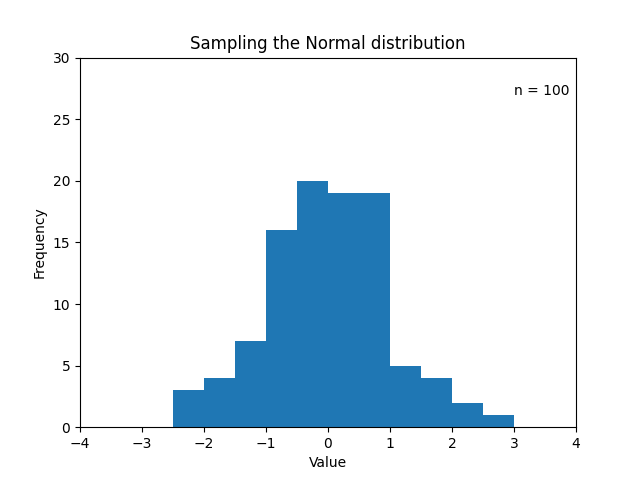

In [30]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

## Interactivity

<IPython.core.display.Javascript object>


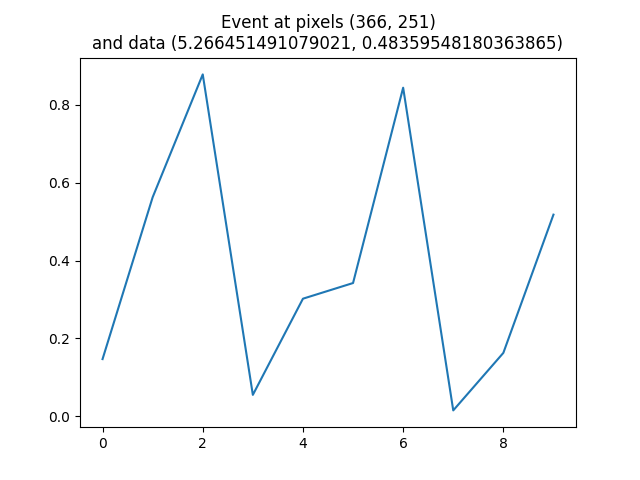

9

In [31]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels ({}, {})\nand data ({}, {})'.format(event.x,
                                                                            event.y,
                                                                            event.xdata,
                                                                            event.ydata))

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [32]:
from random import shuffle

origins = ['Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexica', 'Russia']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})

<IPython.core.display.Javascript object>


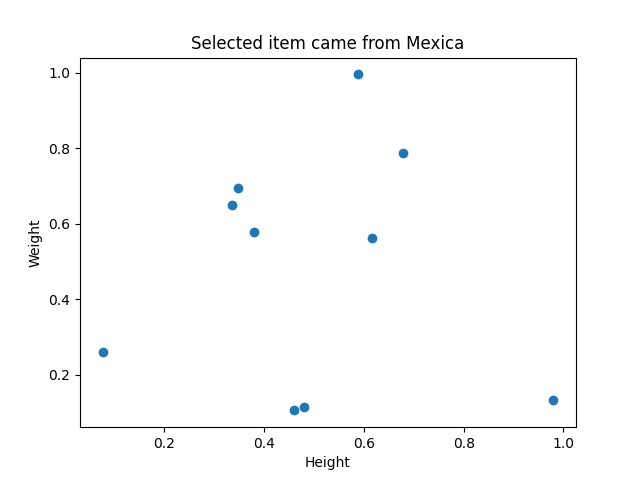

Text(0.5, 0, 'Height')

In [33]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [34]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

plt.gcf().canvas.mpl_connect('pick_event', onpick)

9